In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('cleaned_steam_game_reviews.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_steam_game_reviews.csv'

In [ ]:
df.head(10)

,review,hours_played,helpful,funny,recommendation,date,game_name,username,cleaned_review
0,The game itself is also super fun. The PvP and...,39.9,1152,13,Recommended,NaN,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account,game also super fun pvp campaign joy play acti...
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,NaN,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account,never cared much warhammer game showed error w...
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,NaN,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account,salute fallen battle brother couldnt u year wa...
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,NaN,"Warhammer 40,000: Space Marine 2",Fattest_falcon,game feel like made mid searly like good way
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,NaN,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account,reminds something ive lost genuine game good g...
5,Listen brothers! I have waited more than 10 ye...,73.8,1090,13,Recommended,NaN,"Warhammer 40,000: Space Marine 2",Dootslayer\n366 products in account,listen brother waited year game emperor delive...
6,SummaryCampaign: <15 hours of loreful hack n s...,26.0,1615,18,Recommended,NaN,"Warhammer 40,000: Space Marine 2",Poss,summarycampaign hour loreful hack n slash fun ...
7,This feels like playing one of those games tha...,47.9,355,2,Recommended,NaN,"Warhammer 40,000: Space Marine 2",WassySK\n191 products in account,feel like playing one game came year game camp...
8,"Finally, a solid game, with solid gameplay, va...",46.0,678,13,Recommended,NaN,"Warhammer 40,000: Space Marine 2",Justicetheninja\n391 products in account,finally solid game solid gameplay various mode...
9,"""Blessed is the mind too small for doubt.” War...",68.7,755,63,Recommended,NaN,"Warhammer 40,000: Space Marine 2","Meat-King, The Ultimate\n364 products in account",blessed mind small doubt warhammer space marin...


In [4]:
# Check for missing values
print(df.isnull().sum())


NameError: name 'df' is not defined

In [5]:
df.info()

NameError: name 'df' is not defined

In [6]:
df.describe()

NameError: name 'df' is not defined

In [7]:
df3 = pd.DataFrame(df.dropna())

NameError: name 'df' is not defined

In [8]:
df3.isnull().sum()

NameError: name 'df3' is not defined

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712828 entries, 6132 to 923419
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          712828 non-null  object 
 1   hours_played    712828 non-null  float64
 2   helpful         712828 non-null  int64  
 3   funny           712828 non-null  int64  
 4   recommendation  712828 non-null  object 
 5   date            712828 non-null  object 
 6   game_name       712828 non-null  object 
 7   username        712828 non-null  object 
 8   cleaned_review  712828 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 54.4+ MB


In [10]:
df3.describe()

,hours_played,helpful,funny
count,712828.000000,712828.000000,7.128280e+05
mean,400.498138,25.157053,1.446152e+05
std,1334.931684,189.210310,2.492104e+07
min,0.000000,0.000000,0.000000e+00
25%,22.500000,1.000000,0.000000e+00
50%,73.600000,2.000000,0.000000e+00
75%,263.700000,6.000000,1.000000e+00
max,107075.100000,29631.000000,4.294967e+09


In [39]:
# Apply the conditions
filtered_df = df3[(df3['hours_played'] > 20) & (df3['helpful'] > 5)]

# Get the number of classes
class_counts = filtered_df['recommendation'].value_counts()
print(class_counts)

# Calculate the number of samples for each class
n_samples_per_class = 100000 // len(class_counts)

# Perform stratified sampling with conditions
balanced_df = filtered_df.groupby('recommendation', group_keys=False).apply(lambda x: x.sample(min(len(x), n_samples_per_class), random_state=1))

# Ensure we have 1 lakh rows (if there are not enough samples for some classes)
if len(balanced_df) < 100000:
    remaining_samples = 100000 - len(balanced_df)
    additional_samples = filtered_df[~filtered_df.index.isin(balanced_df.index)].sample(remaining_samples, random_state=1)
    balanced_df = pd.concat([balanced_df, additional_samples])

# Display the first few rows of the balanced DataFrame
print(balanced_df.head())

# Display the distribution of the 'recommendation' column in the balanced DataFrame
print(balanced_df['recommendation'].value_counts())
df4 = pd.DataFrame(balanced_df)


recommendation
Recommended        102165
Not Recommended     41328
Name: count, dtype: int64
                                                   review  hours_played  \
580427  2019 Early Access Review Wow. 5 years already....         202.9   
600362  2018 EULA is garbage. Well outside the refund ...          51.8   
7582    2021 too many hackers and smurfs at low ranks ...        2311.3   
521076  2021 11 Years playing this game and now that's...         541.0   
160948  2015 Time for a serious review after all the 3...        3676.4   

        helpful  funny   recommendation        date             game_name  \
580427        8      0  Not Recommended  2019-03-07         7 Days to Die   
600362      159      5  Not Recommended  2018-05-29  Kerbal Space Program   
7582         21      3  Not Recommended  2021-04-24      Counter-Strike 2   
521076        7      0  Not Recommended  2021-04-29        World of Tanks   
160948      771     40  Not Recommended  2015-06-22              PAYDAY

C:\Users\siddh\AppData\Local\Temp\ipykernel_30932\3636096778.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = filtered_df.groupby('recommendation', group_keys=False).apply(lambda x: x.sample(min(len(x), n_samples_per_class), random_state=1))


In [40]:
df4.head()

,review,hours_played,helpful,funny,recommendation,date,game_name,username,cleaned_review
580427,2019 Early Access Review Wow. 5 years already....,202.9,8,0,Not Recommended,2019-03-07,7 Days to Die,ILikeToasters\n584 products in account,early access review wow year already think day...
600362,2018 EULA is garbage. Well outside the refund ...,51.8,159,5,Not Recommended,2018-05-29,Kerbal Space Program,QDoGG,eula garbage well outside refund range im sol ...
7582,2021 too many hackers and smurfs at low ranks ...,2311.3,21,3,Not Recommended,2021-04-24,Counter-Strike 2,Scientist\n32 products in account,many hacker smurfs low rank dont let play
521076,2021 11 Years playing this game and now that's...,541.0,7,0,Not Recommended,2021-04-29,World of Tanks,Naquash,year playing game thats finally steam cant use...
160948,2015 Time for a serious review after all the 3...,3676.4,771,40,Not Recommended,2015-06-22,PAYDAY 2,Fidanza,time serious review k playtime hour jokeslast ...


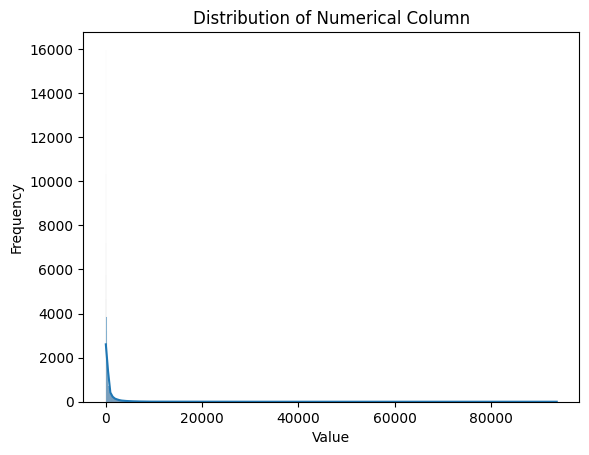

In [41]:

# Histogram for a numerical column
sns.histplot(df4['hours_played'], kde=True)
plt.title('Distribution of Numerical Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


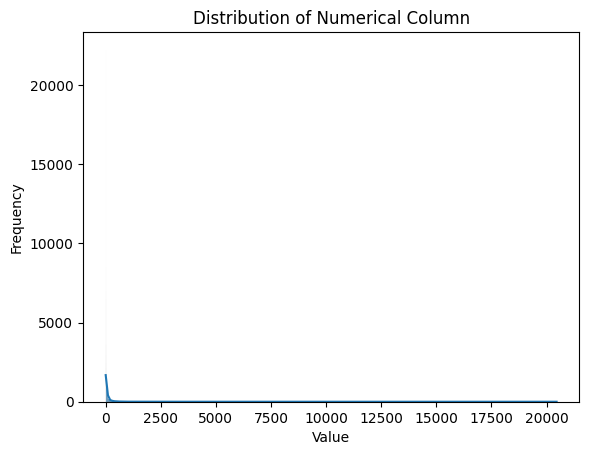

In [42]:

# Histogram for a numerical column
sns.histplot(df4['helpful'], kde=True)
plt.title('Distribution of Numerical Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


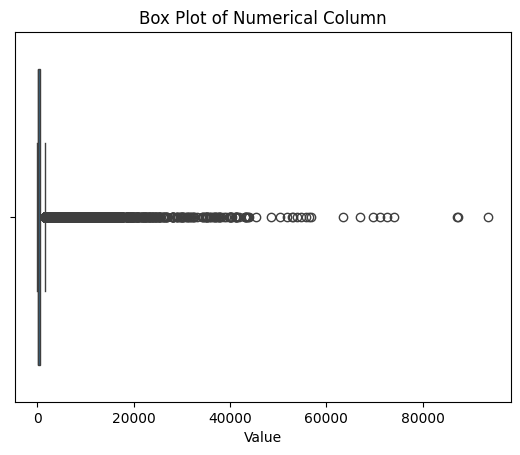

In [43]:
# Box plot for a numerical column
sns.boxplot(x=df4['hours_played'])
plt.title('Box Plot of Numerical Column')
plt.xlabel('Value')
plt.show()


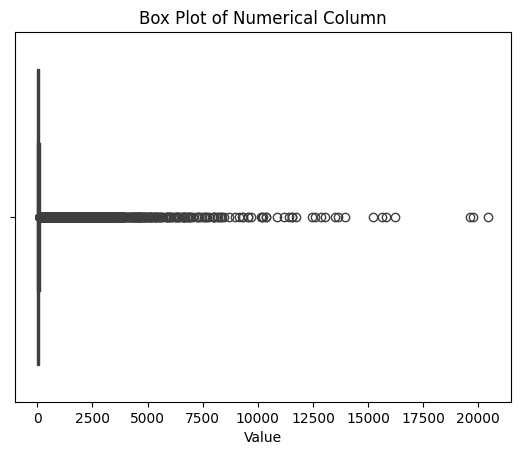

In [74]:
# Box plot for a numerical column
sns.boxplot(x=df4['helpful'])
plt.title('Box Plot of Numerical Column')
plt.xlabel('Value')
plt.show()

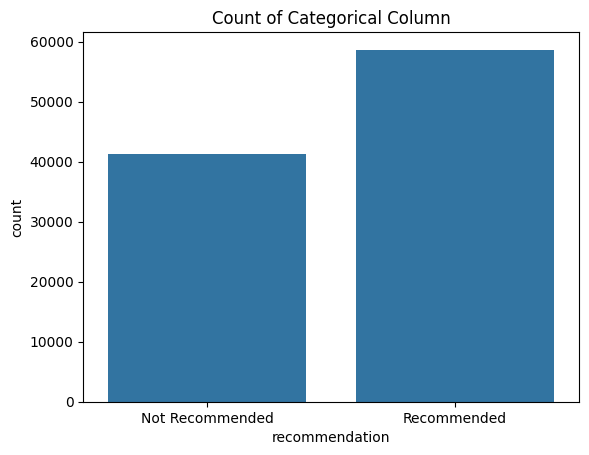

In [44]:
# Bar plot for a categorical column
sns.countplot(x='recommendation', data=df4)
plt.title('Count of Categorical Column')
plt.show()


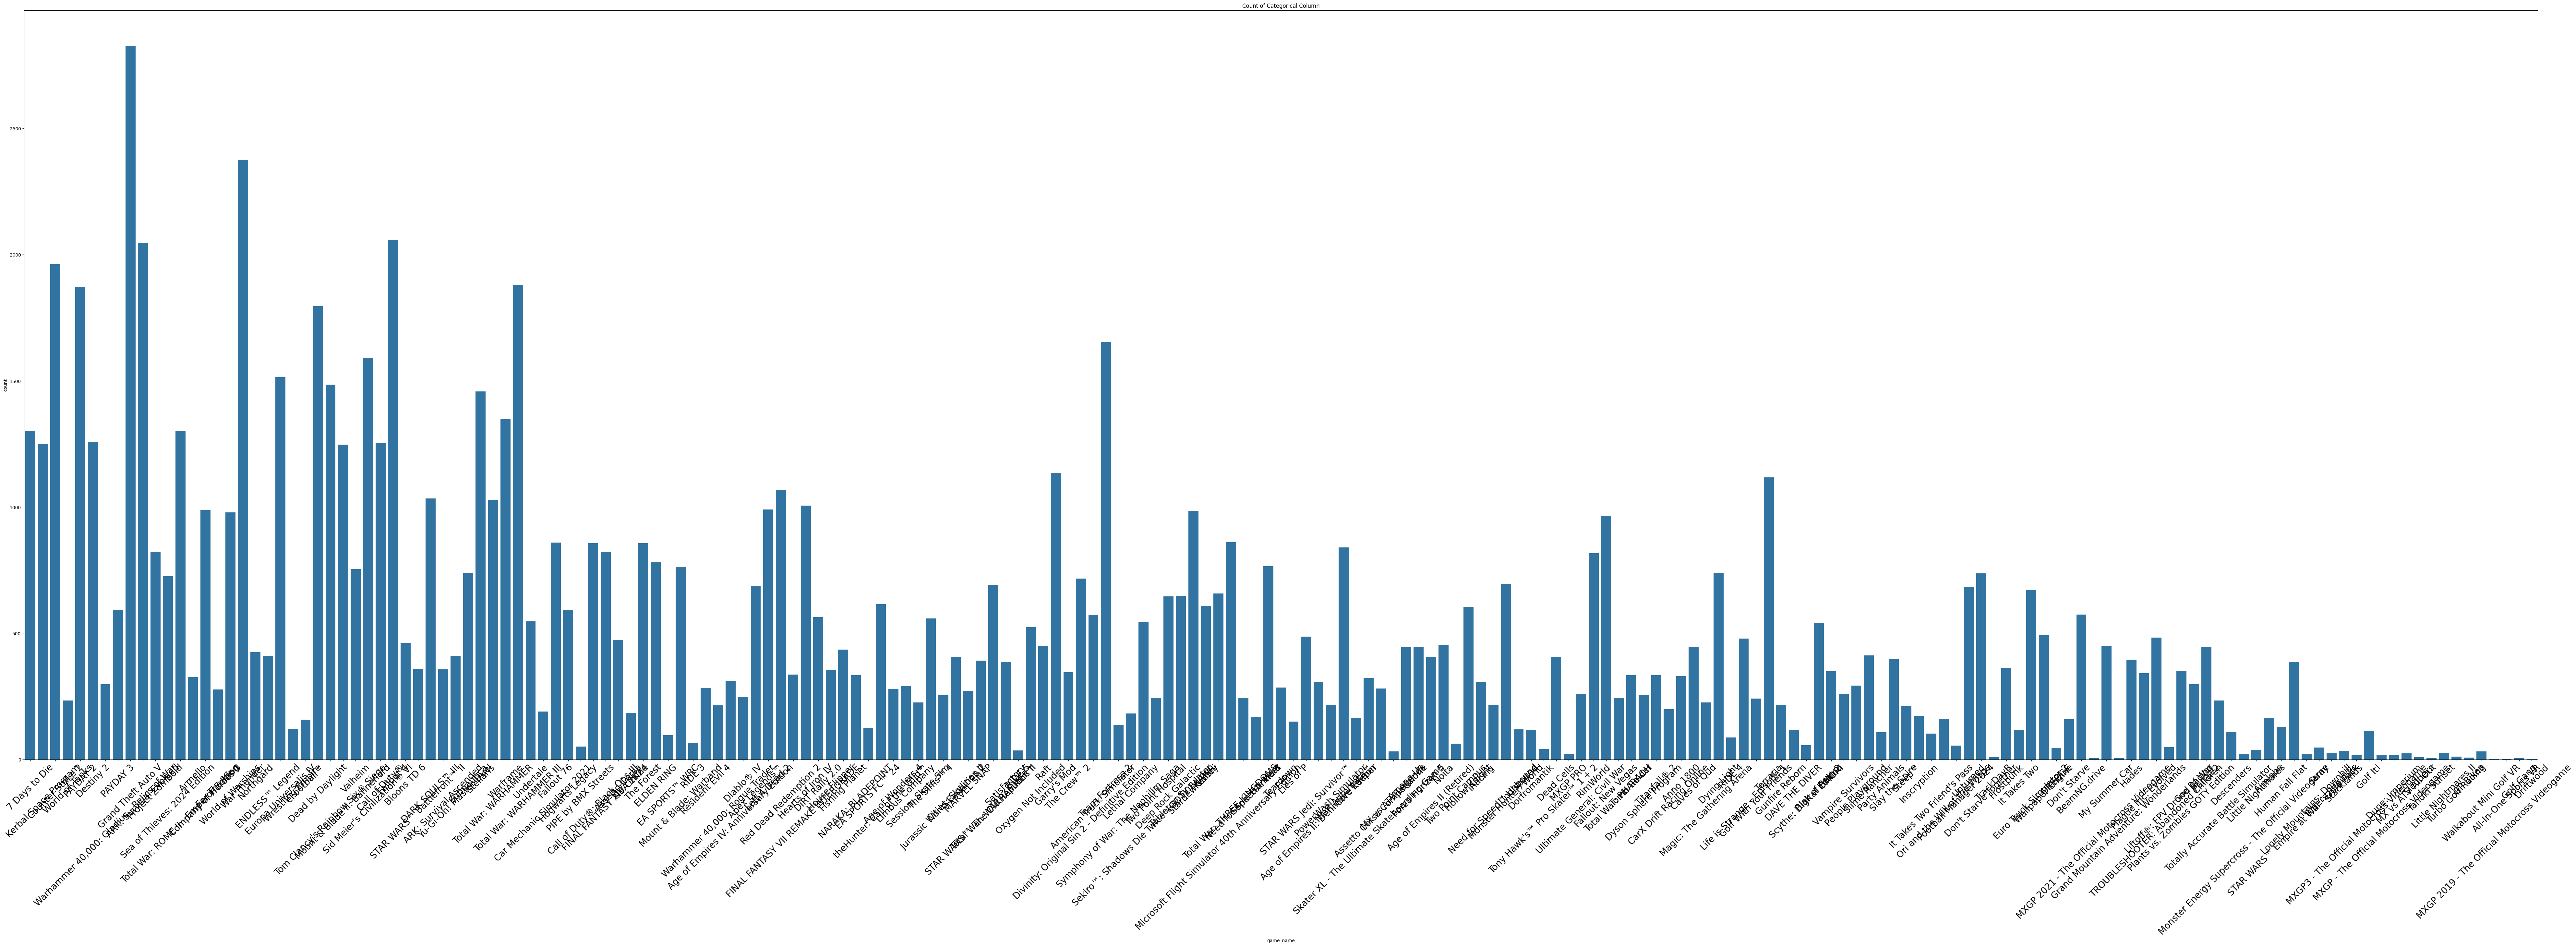

In [ ]:
# Bar plot for a categorical column
plt.figure(figsize=(100, 30))
sns.countplot(x='game_name', data=df4)
# Customize x-axis labels
plt.xticks(rotation=45, fontsize=20)
plt.title('Count of Categorical Column')
plt.show()

In [75]:
print(df4['game_name'].value_counts())

game_name
Grand Theft Auto V                              2827
War Thunder                                     2376
Fallout 4                                       2059
ARK: Survival Evolved                           2046
Counter-Strike 2                                1961
                                                ... 
MXGP 2021 - The Official Motocross Videogame       4
Golf Gang                                          4
MXGP 2019 - The Official Motocross Videogame       2
Driftwood                                          2
All-In-One Sports VR                               1
Name: count, Length: 201, dtype: int64


In [78]:
print(df4['game_name'].unique())

['7 Days to Die' 'Kerbal Space Program' 'Counter-Strike 2'
 'World of Tanks' 'PAYDAY 2' 'Destiny 2'
 'Warhammer 40,000: Gladius - Relics of War' 'PAYDAY 3'
 'Grand Theft Auto V' 'ARK: Survival Evolved' 'Project Zomboid'
 'Sea of Thieves: 2024 Edition' 'Total War: ROME II - Emperor Edition'
 'Armello' 'Company of Heroes 3' 'For The King' 'World of Warships'
 'War Thunder' 'Northgard' 'ENDLESS™ Legend' 'Europa Universalis IV'
 'Wrestling Empire' 'eFootball™' 'Dead by Daylight'
 "Tom Clancy's Rainbow Six® Siege" 'Mount & Blade II: Bannerlord'
 'Valheim' 'Sid Meier’s Civilization® VI' 'Call of Duty®' 'Fallout 4'
 'Bloons TD 6' 'STAR WARS™ Battlefront™ II' 'DARK SOULS™ III'
 'ARK: Survival Ascended' 'Yu-Gi-Oh! Master Duel' 'Subnautica' 'Stellaris'
 'Total War: WARHAMMER' 'Warframe' 'Total War: WARHAMMER III' 'Undertale'
 'Car Mechanic Simulator 2021' 'Fallout 76' 'Hogwarts Legacy'
 'PIPE by BMX Streets' 'Call of Duty®: Black Ops III'
 'FINAL FANTASY XIV Online' 'Assetto Corsa' 'NBA 2K24' 'T

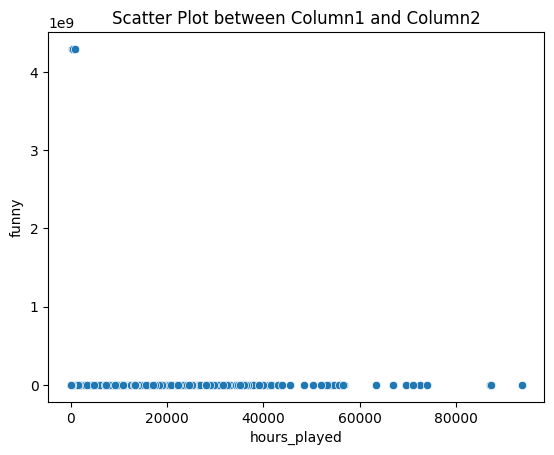

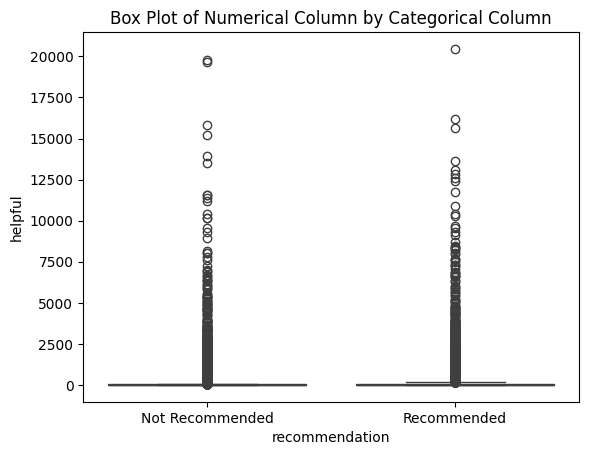

In [45]:
# Scatter plot for two numerical columns
sns.scatterplot(x='hours_played', y='funny', data=df4)
plt.title('Scatter Plot between Column1 and Column2')
plt.show()

# Box plot for a numerical column and a categorical column
sns.boxplot(x='recommendation', y='helpful', data=df4)
plt.title('Box Plot of Numerical Column by Categorical Column')
plt.show()


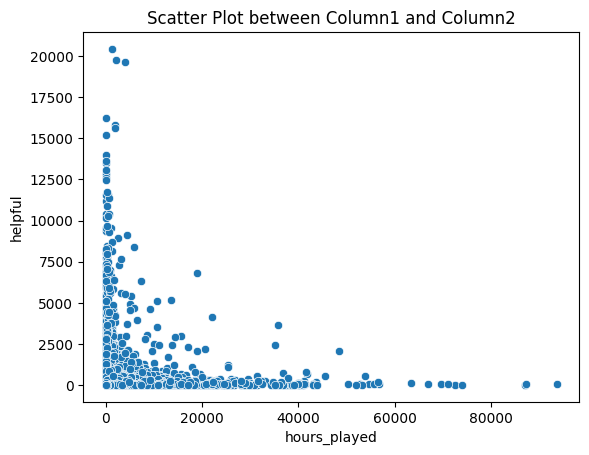

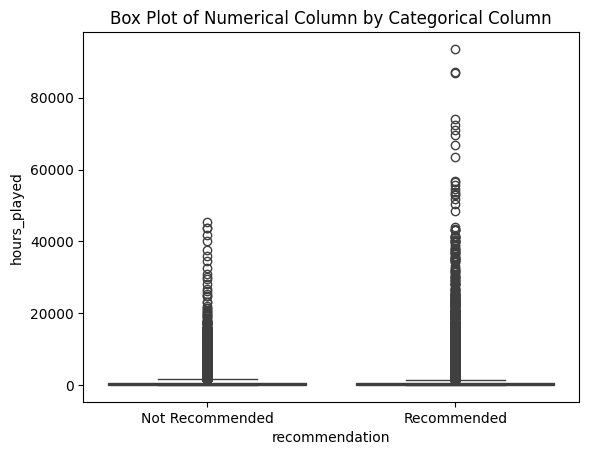

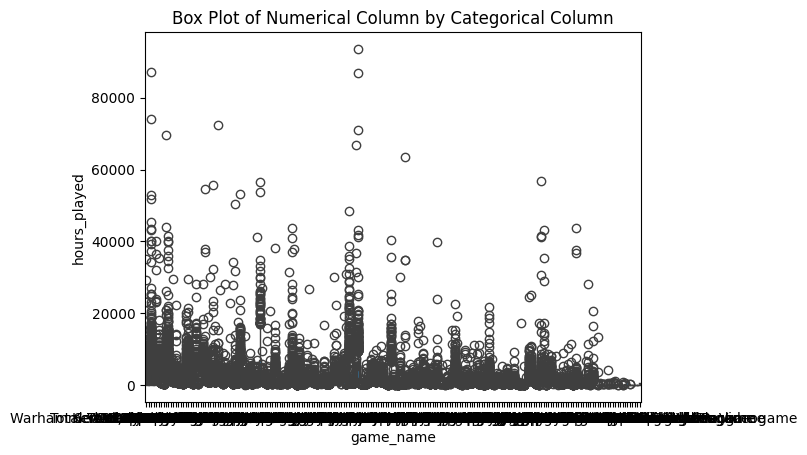

In [57]:
# Scatter plot for two numerical columns
sns.scatterplot(x='hours_played', y='helpful', data=df4)
plt.title('Scatter Plot between Column1 and Column2')
plt.show()

# Box plot for a numerical column and a categorical column
sns.boxplot(x='recommendation', y='hours_played', data=df4)
plt.title('Box Plot of Numerical Column by Categorical Column')
plt.show()
# Box plot for a numerical column and a categorical column
sns.boxplot(x='game_name', y='hours_played', data=df4)
plt.title('Box Plot of Numerical Column by Categorical Column')
plt.show()


In [47]:
# Select only numerical columns
numerical_df = df4.select_dtypes(include=['float64', 'int64'])

# Display the first few rows of the numerical DataFrame
print(numerical_df.head())


        hours_played  helpful  funny
580427         202.9        8      0
600362          51.8      159      5
7582          2311.3       21      3
521076         541.0        7      0
160948        3676.4      771     40


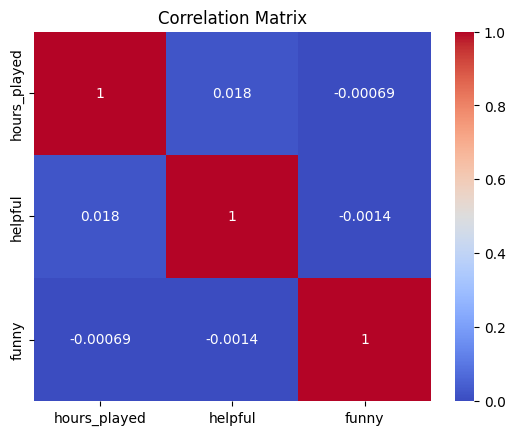

In [48]:
# Correlation matrix
corr_matrix = numerical_df.corr()

# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df4, columns=['recommendation'])

# Standardize numerical variables
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[df_encoded.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df_encoded.select_dtypes(include=['float64', 'int64']))
df_scaled.head()

,review,hours_played,helpful,funny,date,game_name,username,cleaned_review,recommendation_Not Recommended,recommendation_Recommended
580427,2019 Early Access Review Wow. 5 years already....,-0.274292,-0.233102,-0.006326,2019-03-07,7 Days to Die,ILikeToasters\n584 products in account,early access review wow year already think day...,True,False
600362,2018 EULA is garbage. Well outside the refund ...,-0.343894,0.161789,-0.006326,2018-05-29,Kerbal Space Program,QDoGG,eula garbage well outside refund range im sol ...,True,False
7582,2021 too many hackers and smurfs at low ranks ...,0.696911,-0.199105,-0.006326,2021-04-24,Counter-Strike 2,Scientist\n32 products in account,many hacker smurfs low rank dont let play,True,False
521076,2021 11 Years playing this game and now that's...,-0.118551,-0.235718,-0.006326,2021-04-29,World of Tanks,Naquash,year playing game thats finally steam cant use...,True,False
160948,2015 Time for a serious review after all the 3...,1.325724,1.762276,-0.006324,2015-06-22,PAYDAY 2,Fidanza,time serious review k playtime hour jokeslast ...,True,False


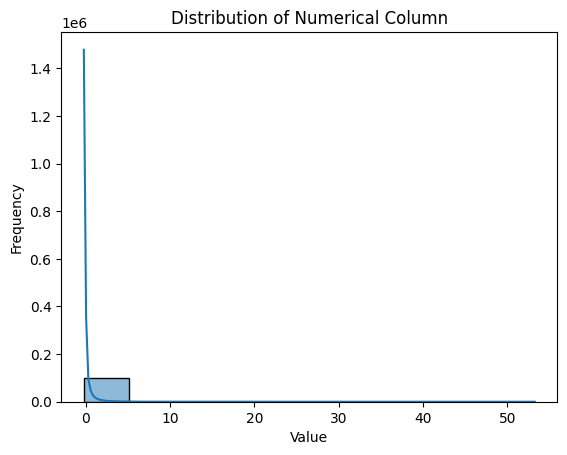

In [50]:
# Histogram for a numerical column
sns.histplot(df_scaled['helpful'],bins=10, kde=True)
plt.title('Distribution of Numerical Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


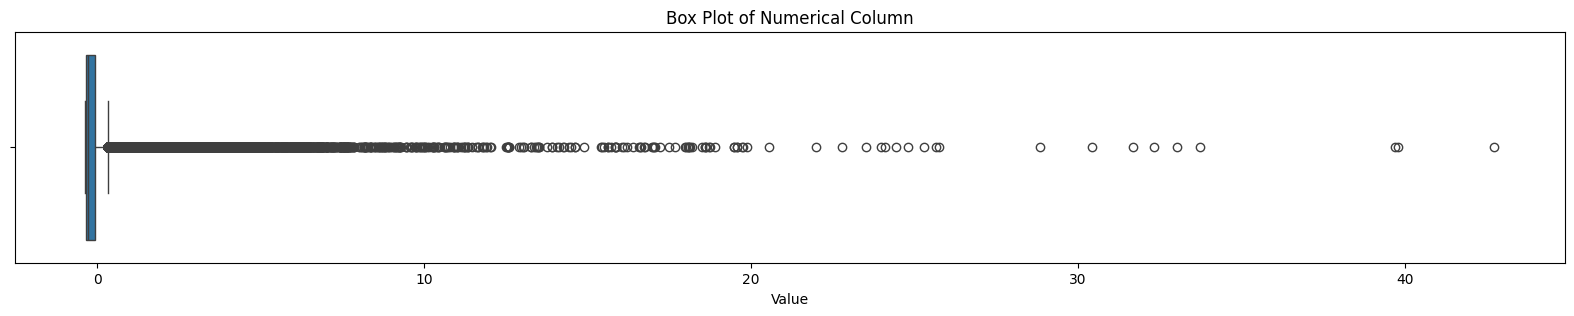

In [51]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=df_scaled['hours_played'])
plt.title('Box Plot of Numerical Column')
plt.xlabel('Value')
plt.show()


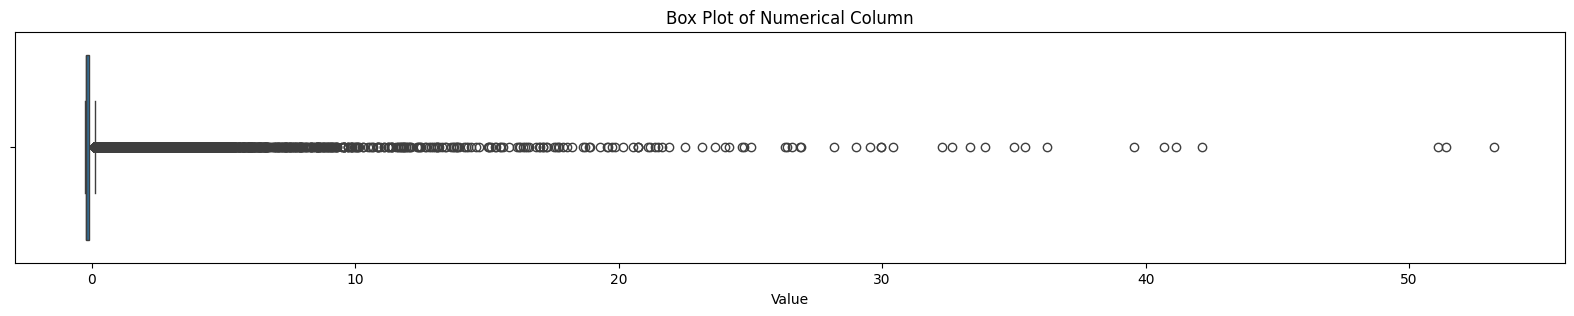

In [52]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=df_scaled['helpful'])
plt.title('Box Plot of Numerical Column')
plt.xlabel('Value')
plt.show()

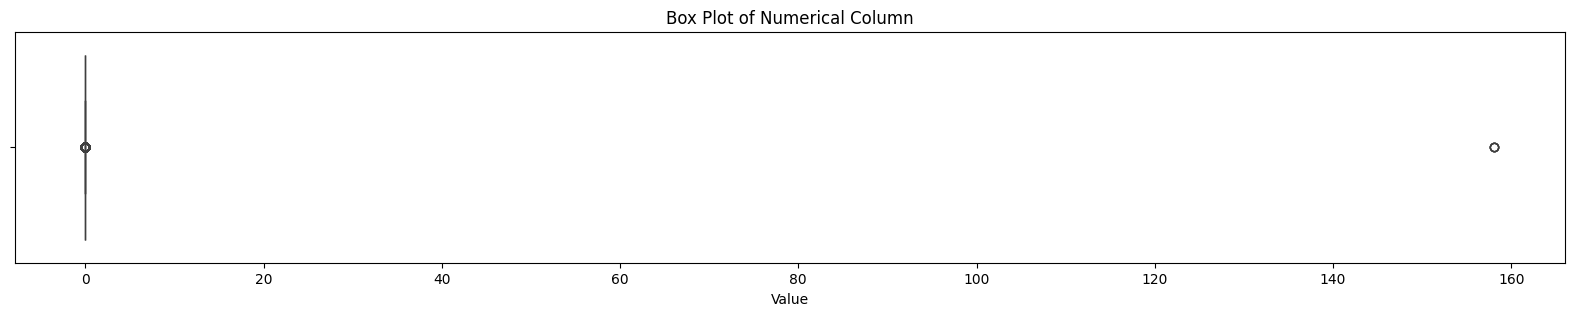

In [53]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=df_scaled['funny'])
plt.title('Box Plot of Numerical Column')
plt.xlabel('Value')
plt.show()

In [ ]:
df_scaled.isnull().sum()


review                            0
hours_played                      0
helpful                           0
funny                             0
date                              0
game_name                         0
username                          0
cleaned_review                    0
recommendation_Not Recommended    0
recommendation_Recommended        0
dtype: int64

In [4]:
df2 = pd.DataFrame(df[['recommendation','cleaned_review']]).copy( deep= True)
print(df2)

         recommendation                                     cleaned_review
0           Recommended  game also super fun pvp campaign joy play acti...
1           Recommended  never cared much warhammer game showed error w...
2           Recommended  salute fallen battle brother couldnt u year wa...
3           Recommended       game feel like made mid searly like good way
4           Recommended  reminds something ive lost genuine game good g...
...                 ...                                                ...
923415      Recommended  early access review load funinitially car cont...
923416      Recommended                      early access review great fun
923417      Recommended  early access review excellent pick play one go...
923418      Recommended  early access review game much fun perfect hop ...
923419  Not Recommended  early access review im love game cant recommen...

[923420 rows x 2 columns]


In [5]:
def change(a):
    if a =='Recommended':
        return 1
    else:
        return 0

In [6]:
df2['recommendation'] = df['recommendation'].apply(change)

In [7]:
print((sum(df2['recommendation']==1))/923420*100)
print((sum(df2['recommendation']==0)/923420*100))



80.34014857811181
19.6598514218882


In [8]:
df2

,recommendation,cleaned_review
0,1,game also super fun pvp campaign joy play acti...
1,1,never cared much warhammer game showed error w...
2,1,salute fallen battle brother couldnt u year wa...
3,1,game feel like made mid searly like good way
4,1,reminds something ive lost genuine game good g...
...,...,...
923415,1,early access review load funinitially car cont...
923416,1,early access review great fun
923417,1,early access review excellent pick play one go...
923418,1,early access review game much fun perfect hop ...


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


df2['cleaned_review'] = df2['cleaned_review'].fillna('')  # Fill missing reviews with empty strings
X = df2['cleaned_review']
y = df2['recommendation']

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Build and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9029044205237053
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.66      0.73     36490
           1       0.92      0.96      0.94    148194

    accuracy                           0.90    184684
   macro avg       0.87      0.81      0.83    184684
weighted avg       0.90      0.90      0.90    184684



In [10]:
from sklearn.naive_bayes import MultinomialNB

# Build and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8762589071061923
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.45      0.59     36490
           1       0.88      0.98      0.93    148194

    accuracy                           0.88    184684
   macro avg       0.87      0.72      0.76    184684
weighted avg       0.87      0.88      0.86    184684



In [11]:
from sklearn.naive_bayes import MultinomialNB
from imblearn.under_sampling import RandomUnderSampler
# Apply undersampling to balance the dataset 
undersample = RandomUnderSampler(random_state=42) 
X_train_res, y_train_res = undersample.fit_resample(X_train, y_train)

# Adjust class weights 
class_weights = {0: 1.2, 1: 1} 
model = MultinomialNB(class_prior=[class_weights[0], class_weights[1]])
model.fit(X_train, y_train)
# Build and train the Naive Bayes model

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7918390331593425
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.89      0.63     36490
           1       0.97      0.77      0.86    148194

    accuracy                           0.79    184684
   macro avg       0.73      0.83      0.74    184684
weighted avg       0.87      0.79      0.81    184684



In [12]:
# import joblib

# # Save the model
# joblib.dump(model, 'naive_bayes_model.pkl')

# # Save the vectorizer
# joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')



In [13]:
# from sklearn.svm import SVC

# # Build and train the SVM model
# model = SVC(kernel='linear')
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))


In [14]:
# from flask import Flask, request, jsonify, render_template
# import joblib
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer

# app = Flask(__name__)

# # Load the model and vectorizer
# model = joblib.load('naive_bayes_model.pkl')
# vectorizer = joblib.load('tfidf_vectorizer.pkl')

# @app.route('/')
# def home():
#     return render_template('index.html')

# @app.route('/predict', methods=['POST'])
# def predict():
#     # Get the review from the form
#     review = request.form['review']
    
#     # Transform the review using the vectorizer
#     review_tfidf = vectorizer.transform([review])
    
#     # Predict the class
#     prediction = model.predict(review_tfidf)
    
#     # Map the prediction to the class name
#     class_name = 'recommended' if prediction[0] == 1 else 'not recommended'
    
#     return render_template('index.html', prediction_text=f'This review is {class_name}')

# if __name__ == "__main__":
#     app.run(debug=True)
